# Hello Random Forest Classifier

In [2]:
# Prerequisites
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print("Python Version: ", sys.version)
print("Numpy Version: ", np.__version__)
np.set_printoptions(precision=3, suppress=True)

Python Version:  3.12.7 (tags/v3.12.7:0b05ead, Oct  1 2024, 03:06:41) [MSC v.1941 64 bit (AMD64)]
Numpy Version:  2.2.2


### Get Data

In [8]:
from sklearn.datasets import load_iris

# Load dataset
#X, y = load_iris(return_X_y=True)
iris = load_iris()
X = iris.data
y = iris.target

print(f"X shape: {X.shape}, y shape: {y.shape}")

nr_samples = X.shape[0]

X shape: (150, 4), y shape: (150,)


In [9]:
from sklearn.model_selection import train_test_split

# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

print(f"X train shape: {X_train.shape}, y shape: {y_train.shape}")
print(f"X validation shape: {X_val.shape}, y shape: {y_val.shape}")
print(f"X test shape: {X_test.shape}, y test: {y_test.shape}")

print(f"Training samples percentage = {X_train.shape[0]/nr_samples:.2f}")
print(f"Validation samples percentage = {X_val.shape[0]/nr_samples:.2f}")
print(f"Test samples percentage = {X_test.shape[0]/nr_samples:.2f}")

X train shape: (90, 4), y shape: (90,)
X validation shape: (30, 4), y shape: (30,)
X test shape: (30, 4), y test: (30,)
Training samples percentage = 0.60
Validation samples percentage = 0.20
Test samples percentage = 0.20


### Train Model

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Evaluate Model

In [11]:
from sklearn.metrics import accuracy_score

# Evaluate with validation set 
val_accy = accuracy_score(y_val, model.predict(X_val))
print(f"Validation Accuracy: {val_accy:.2f}")

# Evaluation with test set
test_accy = accuracy_score(y_test, model.predict(X_test))
print(f"Test Accuracy: {test_accy:.2f}")

Validation Accuracy: 0.90
Test Accuracy: 0.97


### Plot Tree

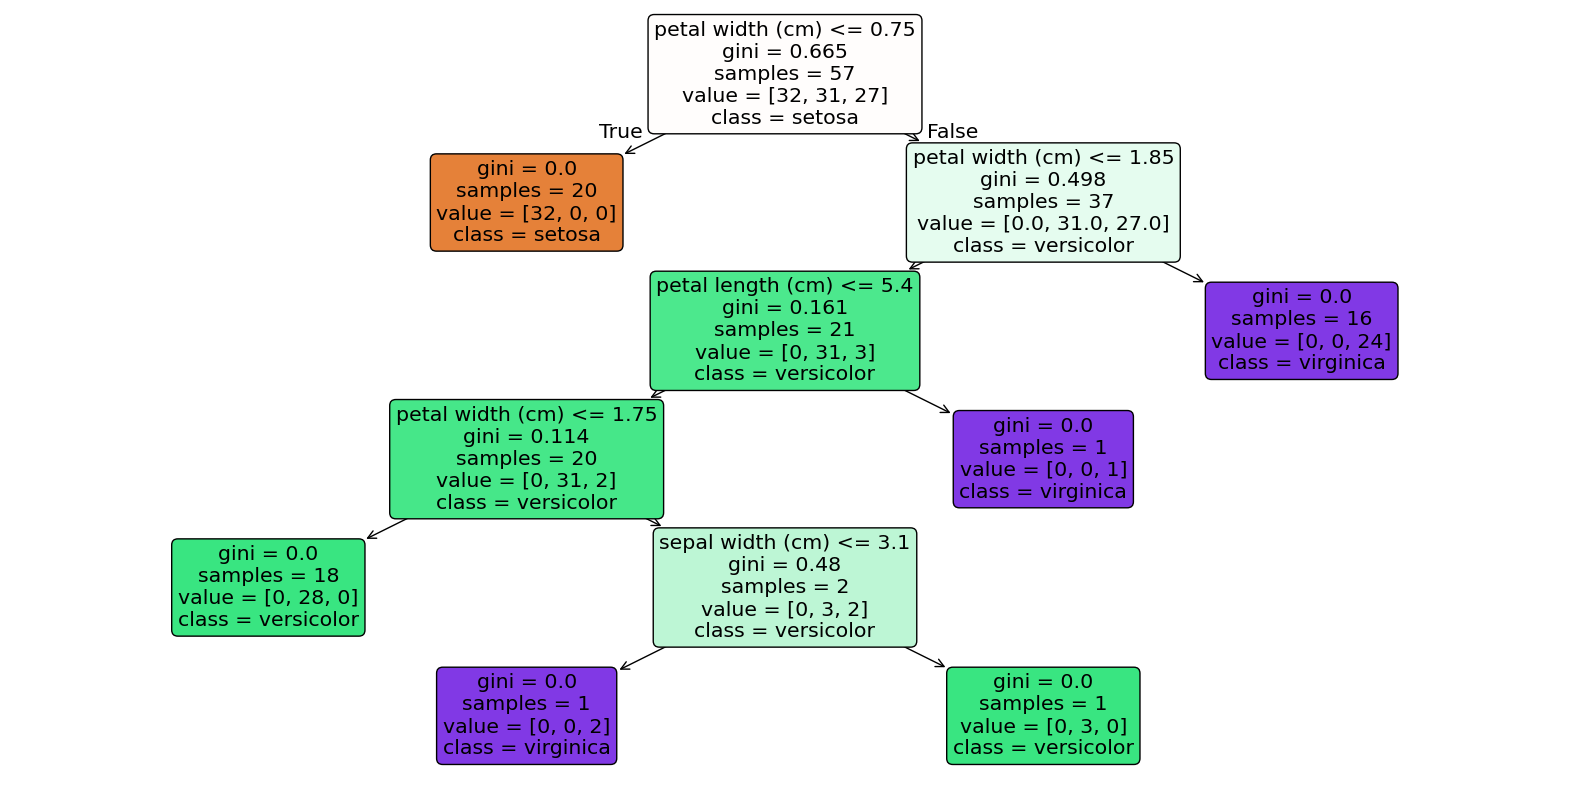

In [12]:
from sklearn.tree import plot_tree

# Extract a single tree from the forest (e.g., the first tree)
estimator = model.estimators_[0]

# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(estimator, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.show()